<center><H1>EE 679: Computing Assignment 1B</H1>
<H2> Name: Vinit Awale</H2>
<H2> Roll No: 18D070067 </H2>
<H2> Date: 23/9/2021</H2>
</center>

## Question 

Use your previous synthesized vowel /u/ at two distinct pitches (F0 = 120 Hz, F0 = 220 Hz).
Keep the bandwidths constant at 100 Hz for all formants.  
Vowel F1, F2, F3  
  /u/ 300, 870, 2240 

We would like to use the DFT computed with various window lengths and shapes to estimate the vowel’s
F0 and formant frequencies and study the obtained accuracies with reference to our ‘ground truth’ values.
For the analysis, use a single waveform segment near the centre of your synthesized vowel.

Plot the magnitude (dB) spectrum with rectangular and Hamming windows of lengths: 5 ms, 10 ms, 20
ms, 40 ms, each with a large zero-padded DFT.  (i) Comment on the similarities and differences between
the different computed spectra. (ii) Estimate the signal parameters from each of the magnitude spectra and
report the error with respect to the ground-truth. 

## Solution:

In [1]:
## We have the ground truth values as 
F1 = 300
F2 = 870
F3 = 2240 

In [2]:
## Read the sound file
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

def read_wav(file_name):
    """
    Reads a wav file and returns the sampling rate and the data
    """
    sampling_rate, data = wav.read(file_name)
    return sampling_rate, data

sampling_rate, u_120 = read_wav('Sounds-u\\u_F0-120_F1-300F2-870F3-2240_B1-50B2B3-100_Fs16k.wav')
sampling_rate, u_220 = read_wav('Sounds-u\\u_F0-220_F1-300F2-870F3-2240_B1-50B2B3-100_Fs16k.wav')

# Also we generate a vector of time instants
time = np.arange(0, len(u_120)) / sampling_rate


The sounds are generated for 1 second. Now, we observe their waveform for 50 ms.

Text(0, 0.5, 'Amplitude')

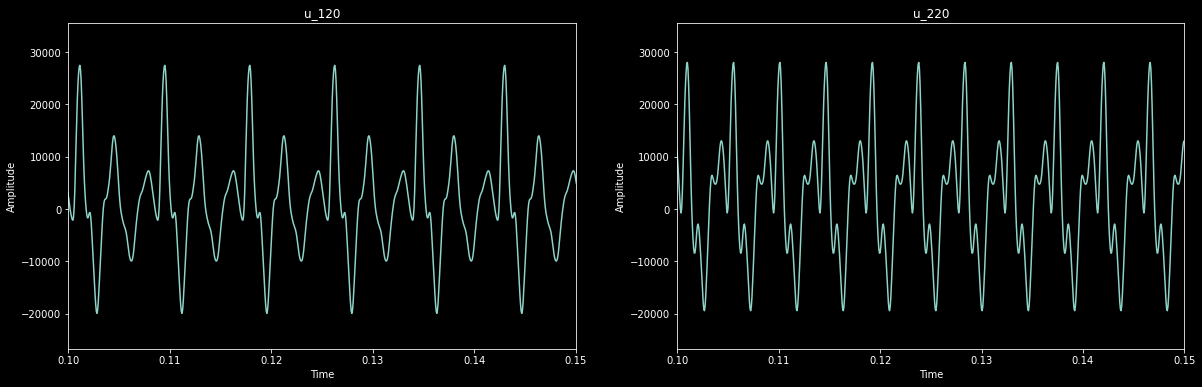

In [3]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(time,u_120)
plt.xlim(0.1,0.15)
plt.title('u_120')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(1,2,2)
plt.plot(time,u_220)
plt.xlim(0.1,0.15)
plt.title('u_220')
plt.xlabel('Time')
plt.ylabel('Amplitude')


## Generating the Window Functions

### Hamming Window

In [4]:
### Now we make a Hamming Window
    
def hamming(N):
    """Function to generate a Hamming Window of given number of samples

    Args:
        N (int): Number of samples

    Returns:
        ndarray: Hamming Window of length N
    """
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = 0.54 - 0.46 * np.cos(2 * np.pi * k / (N - 1))
    return M


In [5]:
# Now we make the Hamming windows of 5ms, 10ms, 20ms and 40ms

hamming_5ms = hamming(int(0.005 * sampling_rate))
hamming_10ms = hamming(int(0.01 * sampling_rate))
hamming_20ms = hamming(int(0.02 * sampling_rate))
hamming_40ms = hamming(int(0.04 * sampling_rate))

## Time vector for the Hamming windows
time_5ms = np.arange(0, len(hamming_5ms)) / sampling_rate
time_10ms = np.arange(0, len(hamming_10ms)) / sampling_rate
time_20ms = np.arange(0, len(hamming_20ms)) / sampling_rate
time_40ms = np.arange(0, len(hamming_40ms)) / sampling_rate



Text(0.5, 0, 'Time')

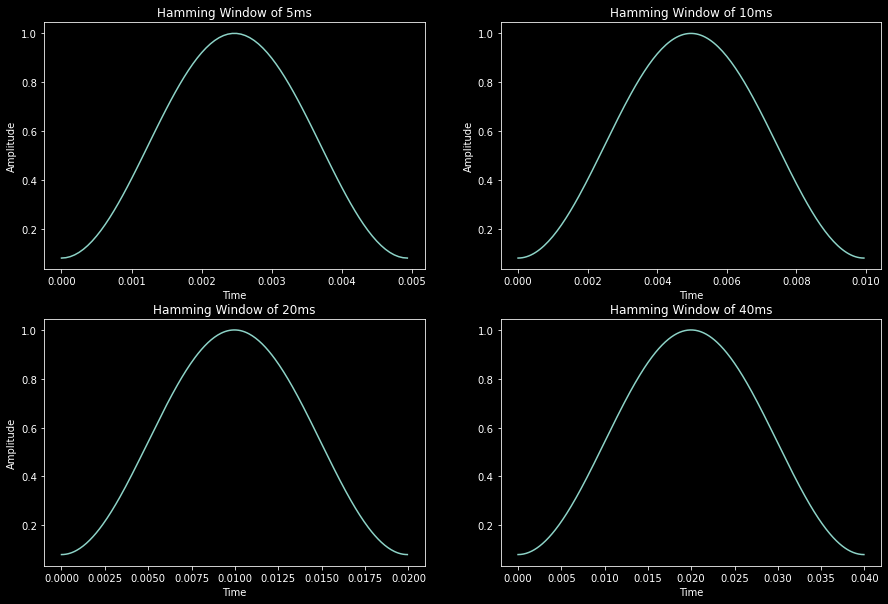

In [6]:
# Visualising the Hamming windows
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(time_5ms,hamming_5ms)
plt.title('Hamming Window of 5ms')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2,2,2)
plt.plot(time_10ms,hamming_10ms)
plt.title('Hamming Window of 10ms')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2,2,3)
plt.plot(time_20ms,hamming_20ms)
plt.title('Hamming Window of 20ms')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2,2,4)
plt.plot(time_40ms,hamming_40ms)
plt.title('Hamming Window of 40ms')
plt.xlabel('Time')

### Rectangular Window

In [7]:
## Similarly we make rectangular window of 5ms, 10ms, 20ms and 40ms

rectangular_5ms = np.ones(int(0.005 * sampling_rate))
rectangular_10ms = np.ones(int(0.01 * sampling_rate))
rectangular_20ms = np.ones(int(0.02 * sampling_rate))
rectangular_40ms  = np.ones(int(0.04 * sampling_rate))

## <b> FINDING THE DFT AND SIGNAL PROPERTIES FROM THE DFT

## Pitch = 120 Hz

In [8]:
F0 = 120      ## Given value of pitch

## DFT using Hamming Windows (Pitch = 120 Hz)

In [9]:
## Now we multiply the Hamming windows with the signal and find its DFT magnitude

def dft(vowel, window):
	Window = vowel[1000:1000+len(window)].flatten() * window.flatten()

	# Add zero padding to the Window
	Window = np.append(Window, np.zeros(10000*len(Window)))

	# Find the DFT of the Window using the FFT function
	ft = np.fft.fft(Window)
	ft = np.abs(ft)

	# frequency vector
	f = np.fft.fftfreq(len(ft), 1/sampling_rate)

	return ft, f 


Text(0.5, 1.0, 'DFT using a Hamming Window of 40ms interval')

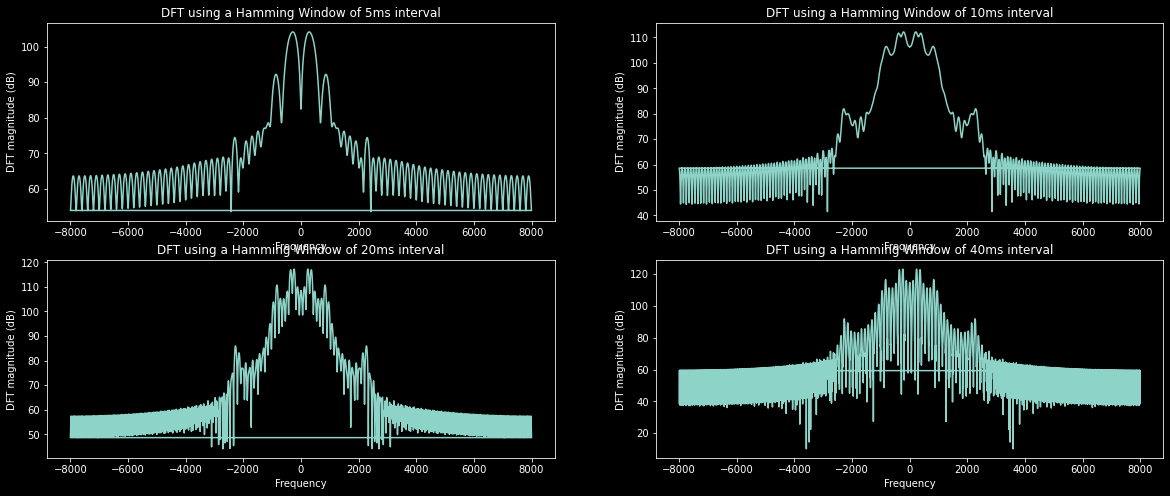

In [10]:
# Find the DFT of the signals using Hamming window

ft_120_5 , f_120_5 =  dft(u_120, hamming_5ms)
ft_120_10 , f_120_10 = dft(u_120, hamming_10ms)
ft_120_20 , f_120_20 = dft(u_120, hamming_20ms)
ft_120_40 , f_120_40 = dft(u_120 , hamming_40ms)


# Plot the DFTs 
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)
plt.plot(f_120_5, 20*np.log10(ft_120_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")

plt.subplot(2,2,2)
plt.plot(f_120_10, 20*np.log10(ft_120_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 10ms interval")

plt.subplot(2,2,3)
plt.plot(f_120_20, 20*np.log10(ft_120_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 20ms interval")

plt.subplot(2,2,4)
plt.plot(f_120_40 , 20*np.log10(ft_120_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 40ms interval")


## Getting the signal properties from the DFT obtained

In [11]:
## Getting signal properties from the DFT obtained

def find_formant(ft , f, freq_low, freq_high):
    """
    Assuming there is only one formant in the given frequency range we find that formant using this function
    """
    # Get indices of frequencies between freq_low and freq_high

    indices_1 = np.where(f>freq_low)
    indices_2 = np.where(f<freq_high)
    indices = np.intersect1d(indices_1, indices_2)
    val_freq = f[indices]
    return list(set(np.abs(f[np.where(ft == np.max(ft[indices]))])))

<b> For all the DFT plots we can observe the following </b> :
- We can see from the DFT plot that the first formant frequency is somewhere between 0- 500 Hz
- Also we can see that the second formant is in range 500-1000 Hz
- The third formant lies in the range 2000-3000 Hz

### <b> For DFT of /u/ (pitch = 120 Hz) and Hamming Window of 5 ms </b>

In [12]:
f1_5ms  = find_formant(ft_120_5 , f_120_5 , 0, 500)[0]
f2_5ms  = find_formant(ft_120_5 , f_120_5 , 600, 1000)[0]
f3_5ms = find_formant(ft_120_5 , f_120_5 , 2000, 3000)[0]
print("The first formant is at ", str(f1_5ms), "and the error from ground truth is ", str(F1-f1_5ms) , "Hz")
print("The second formant is at ", str(f2_5ms), "and the error from ground truth is ", str(F2-f2_5ms), "Hz")
print("The third formant is at ", str(f3_5ms), "and the error from ground truth is ", str(F3-f3_5ms), "Hz")

The first formant is at  284.2515748425157 and the error from ground truth is  15.748425157484292 Hz
The second formant is at  865.6134386561342 and the error from ground truth is  4.386561343865765 Hz
The third formant is at  2295.050494950505 and the error from ground truth is  -55.0504949505048 Hz


### <b> For DFT of /u/ (pitch = 120 Hz) and Hamming Window of 10 ms </b>

In [13]:
f1_10ms  = find_formant(ft_120_10 , f_120_10 , 0, 500)[0]
f2_10ms  = find_formant(ft_120_10 , f_120_10 , 500, 1000)[0]
f3_10ms = find_formant(ft_120_10 , f_120_10 , 2000, 3000)[0]
print("The first formant is at ", str(f1_10ms), "and the error from ground truth is ", str(F1-f1_10ms) , "Hz")
print("The second formant is at ", str(f2_10ms), "and the error from ground truth is ", str(F2-f2_10ms), "Hz")
print("The third formant is at ", str(f3_10ms), "and the error from ground truth is ", str(F3-f3_10ms), "Hz")

The first formant is at  211.37886211378859 and the error from ground truth is  88.62113788621141 Hz
The second formant is at  813.3786621337865 and the error from ground truth is  56.62133786621348 Hz
The third formant is at  2288.6811318868113 and the error from ground truth is  -48.68113188681127 Hz


### <b> For DFT of /u/ (pitch = 120 Hz) and Hamming Window of 20 ms </b>

In [14]:
f1_20ms  = find_formant(ft_120_20 , f_120_20 , 0, 500)[0]
f2_20ms  = find_formant(ft_120_20 , f_120_20 , 500, 1000)[0]
f3_20ms = find_formant(ft_120_20 , f_120_20 , 2000, 3000)[0]
print("The first formant is at ", str(f1_20ms), "and the error from ground truth is ", str(F1-f1_20ms) , "Hz")
print("The second formant is at ", str(f2_20ms), "and the error from ground truth is ", str(F2-f2_20ms), "Hz")
print("The third formant is at ", str(f3_20ms), "and the error from ground truth is ", str(F3-f3_20ms), "Hz")

The first formant is at  238.83611638836115 and the error from ground truth is  61.16388361163885 Hz
The second formant is at  835.3414658534145 and the error from ground truth is  34.65853414658545 Hz
The third formant is at  2272.0077992200777 and the error from ground truth is  -32.007799220077686 Hz


### <b> For DFT of /u/ (pitch = 120 Hz) and Hamming Window of 40 ms </b>

In [15]:
f1_40ms  = find_formant(ft_120_40 , f_120_40 , 0, 500)[0]
f2_40ms  = find_formant(ft_120_40 , f_120_40 , 500, 1000)[0]
f3_40ms = find_formant(ft_120_40 , f_120_40 , 2000, 3000)[0]
print("The first formant is at ", str(f1_40ms), "and the error from ground truth is ", str(F1-f1_40ms) , "Hz")
print("The second formant is at ", str(f2_40ms), "and the error from ground truth is ", str(F2-f2_40ms), "Hz")
print("The third formant is at ", str(f3_40ms), "and the error from ground truth is ", str(F3-f3_40ms), "Hz")

The first formant is at  238.5786421357864 and the error from ground truth is  61.421357864213604 Hz
The second formant is at  835.6964303569642 and the error from ground truth is  34.30356964303576 Hz
The third formant is at  2270.0304969503045 and the error from ground truth is  -30.030496950304496 Hz


### Hence we can see that the obtained formant frequencies are close to the ground truth formants in all the cases

### <b> Estimating F0 from the DFT plots obtained </b>

#### Window length 5 ms

<function matplotlib.pyplot.show(close=None, block=None)>

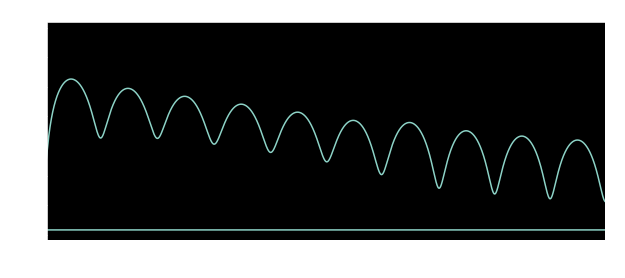

In [68]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_120_5, 20*np.log10(ft_120_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1100 Hz and other is around 1300 Hz. We find the exact frequencies by seeing the plot interactively

In [69]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_120_5, 20*np.log10(ft_120_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1100,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1100 Hz and 1280 Hz. 

In [70]:
f0_5ms  = 1280 - 1100
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  180  Hz, and the error is  -60  Hz


#### Window length 10 ms

<function matplotlib.pyplot.show(close=None, block=None)>

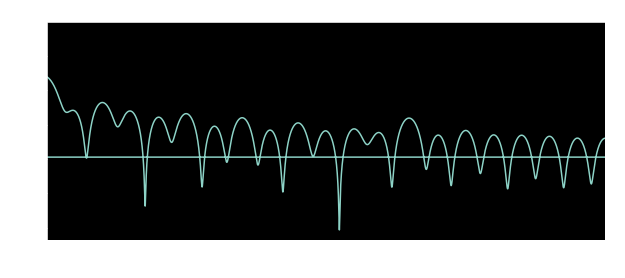

In [71]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_120_10, 20*np.log10(ft_120_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 10ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1200 Hz and other is around 1300 Hz. We find the exact frequencies by seeing the plot interactively.

In [75]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_120_10, 20*np.log10(ft_120_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 10ms interval")
plt.xlim(1000 , 2000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1200 Hz and 1300 Hz. 

In [74]:
f0_5ms  = 1300 - 1200
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  100  Hz, and the error is  20  Hz


#### Window length 20 ms

<function matplotlib.pyplot.show(close=None, block=None)>

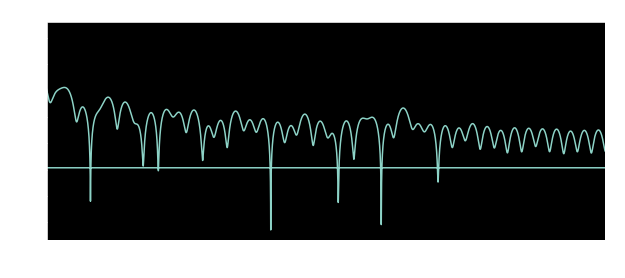

In [76]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_120_20, 20*np.log10(ft_120_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000, 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1250 Hz and other is around 1400 Hz. We find the exact frequencies by seeing the plot interactively.

In [78]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_120_20, 20*np.log10(ft_120_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1366 Hz and 1200 Hz. 

In [79]:
f0_5ms  = 1366 - 1200
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  166  Hz, and the error is  -46  Hz


#### Window length 40 ms

<function matplotlib.pyplot.show(close=None, block=None)>

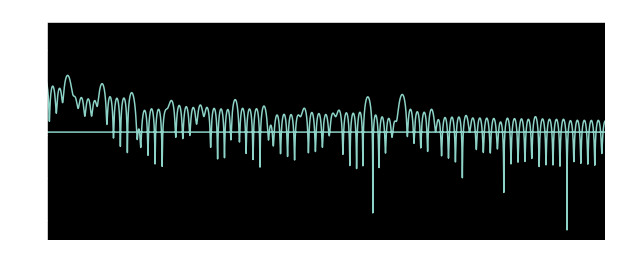

In [80]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_120_40, 20*np.log10(ft_120_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1100 Hz and other is around 1200 Hz. We find the exact frequencies by seeing the plot interactively

In [81]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_120_40, 20*np.log10(ft_120_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1072 Hz and 1197 Hz. 

In [82]:
f0_5ms  = 1197 - 1072
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  125  Hz, and the error is  -5  Hz


### <b> Hence we can observe that as the window length increases we can better estimate the f0

## DFT using Rectangular Windows (Pitch = 120 Hz)

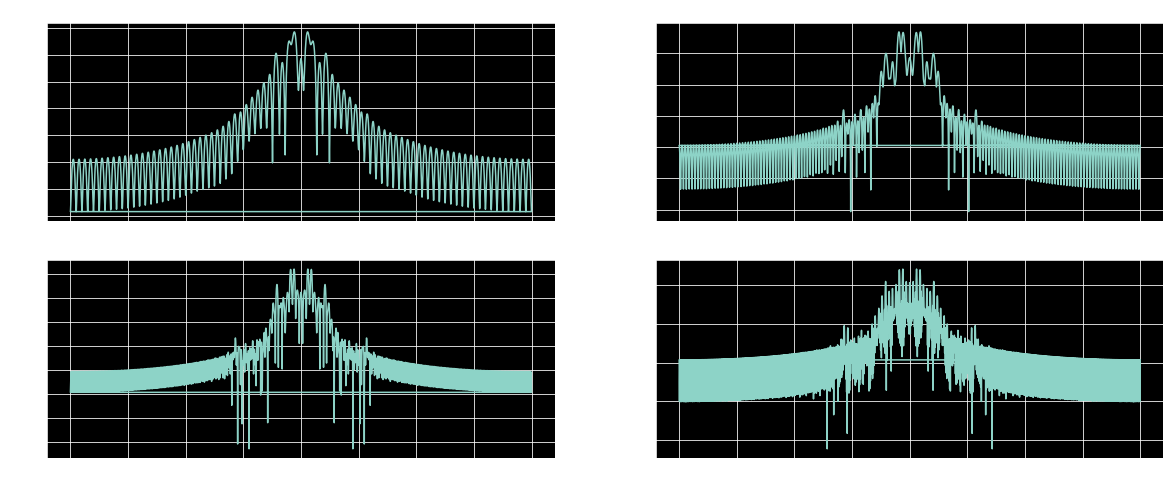

In [83]:
# Finding the DFT using a rectangular window of given time intervals

%matplotlib inline

ft_120_5 , f_120_5 = dft(u_120, rectangular_5ms)
ft_120_10 , f_120_10 = dft(u_120, rectangular_10ms)
ft_120_20 , f_120_20 = dft(u_120, rectangular_20ms)
ft_120_40 , f_120_40= dft(u_120, rectangular_40ms)


# Plot the DFTs 
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)
plt.plot(f_120_5, 20*np.log10(ft_120_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Rectangular Window of 5ms interval")
plt.grid()

plt.subplot(2,2,2)
plt.plot(f_120_10, 20*np.log10(ft_120_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Rectangular Window of 10ms interval")
plt.grid()

plt.subplot(2,2,3)
plt.plot(f_120_20, 20*np.log10(ft_120_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Rectangular Window of 20ms interval")
plt.grid()

plt.subplot(2,2,4)
plt.plot(f_120_40 , 20*np.log10(ft_120_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Rectangular Window of 40ms interval")
plt.grid()


<b> For all the DFT plots we can observe the following </b> :
- We can see from the DFT plot that the first formant frequency is somewhere between 0- 500 Hz
- Also we can see that the second formant is in range 500-1000 Hz
- The third formant lies in the range 2000-3000 Hz

### <b> For DFT of /u/ (pitch = 120 Hz) and Rectangular Window of 5 ms </b>

In [84]:
f1_5ms  = find_formant(ft_120_5 , f_120_5 , 0, 500)[0]
f2_5ms  = find_formant(ft_120_5 , f_120_5 , 500, 1000)[0]
f3_5ms = find_formant(ft_120_5 , f_120_5 , 2000, 3000)[0]
print("The first formant is at ", str(f1_5ms), "and the error from ground truth is ", str(F1-f1_5ms) , "Hz")
print("The second formant is at ", str(f2_5ms), "and the error from ground truth is ", str(F2-f2_5ms), "Hz")
print("The third formant is at ", str(f3_5ms), "and the error from ground truth is ", str(F3-f3_5ms), "Hz")

The first formant is at  229.7770222977702 and the error from ground truth is  70.2229777022298 Hz
The second formant is at  863.5736426357363 and the error from ground truth is  6.426357364263708 Hz
The third formant is at  2096.2103789621037 and the error from ground truth is  143.78962103789627 Hz


### <b> For DFT of /u/ (pitch = 120 Hz) and Rectangular Window of 10 ms </b>

In [85]:
f1_10ms  = find_formant(ft_120_10 , f_120_10 , 0, 500)[0]
f2_10ms  = find_formant(ft_120_10 , f_120_10 , 500, 1000)[0]
f3_10ms = find_formant(ft_120_10 , f_120_10 , 2000, 3000)[0]
print("The first formant is at ", str(f1_10ms), "and the error from ground truth is ", str(F1-f1_10ms) , "Hz")
print("The second formant is at ", str(f2_10ms), "and the error from ground truth is ", str(F2-f2_10ms), "Hz")
print("The third formant is at ", str(f3_10ms), "and the error from ground truth is ", str(F3-f3_10ms), "Hz")

The first formant is at  373.63263673632633 and the error from ground truth is  -73.63263673632633 Hz
The second formant is at  823.0576942305769 and the error from ground truth is  46.942305769423115 Hz
The third formant is at  2296.4503549645033 and the error from ground truth is  -56.450354964503276 Hz


### <b> For DFT of /u/ (pitch = 120 Hz) and Rectangular Window of 20 ms </b>

In [86]:
f1_20ms  = find_formant(ft_120_20 , f_120_20 , 0, 500)[0]
f2_20ms  = find_formant(ft_120_20 , f_120_20 , 500, 1000)[0]
f3_20ms = find_formant(ft_120_20 , f_120_20 , 2000, 3000)[0]
print("The first formant is at ", str(f1_20ms), "and the error from ground truth is ", str(F1-f1_20ms) , "Hz")
print("The second formant is at ", str(f2_20ms), "and the error from ground truth is ", str(F2-f2_20ms), "Hz")
print("The third formant is at ", str(f3_20ms), "and the error from ground truth is ", str(F3-f3_20ms), "Hz")

The first formant is at  239.21607839216077 and the error from ground truth is  60.78392160783923 Hz
The second formant is at  833.8366163383661 and the error from ground truth is  36.16338366163393 Hz
The third formant is at  2275.412458754124 and the error from ground truth is  -35.412458754124145 Hz


### <b> For DFT of /u/ (pitch = 120 Hz) and Rectangular Window of 40 ms </b>

In [87]:
f1_40ms  = find_formant(ft_120_40 , f_120_40 , 0, 500)[0]
f2_40ms  = find_formant(ft_120_40 , f_120_40 , 500, 1000)[0]
f3_40ms = find_formant(ft_120_40 , f_120_40 , 2000, 3000)[0]
print("The first formant is at ", str(f1_40ms), "and the error from ground truth is ", str(F1-f1_40ms) , "Hz")
print("The second formant is at ", str(f2_40ms), "and the error from ground truth is ", str(F2-f2_40ms), "Hz")
print("The third formant is at ", str(f3_40ms), "and the error from ground truth is ", str(F3-f3_40ms), "Hz")

The first formant is at  237.5662433756624 and the error from ground truth is  62.433756624337605 Hz
The second formant is at  835.2514748525147 and the error from ground truth is  34.74852514748534 Hz
The third formant is at  2272.105289471053 and the error from ground truth is  -32.105289471052856 Hz


### Hence we can see that the obtained formant frequencies are close to the ground truth formants in all the cases

### <b> Estimating F0 from the DFT plots obtained </b>

#### Window length 5 ms

<function matplotlib.pyplot.show(close=None, block=None)>

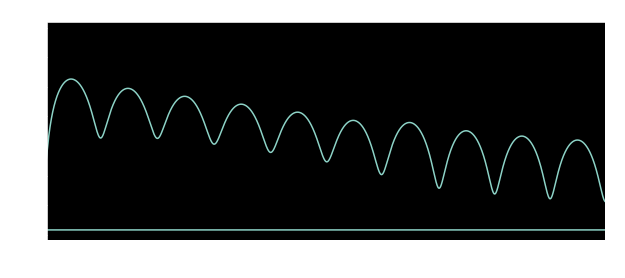

In [88]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_120_5, 20*np.log10(ft_120_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1100 Hz and other is around 1300 Hz. We find the exact frequencies by seeing the plot interactively

In [89]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_120_5, 20*np.log10(ft_120_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1100,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1100 Hz and 1280 Hz. 

In [90]:
f0_5ms  = 1280 - 1100
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  180  Hz, and the error is  -60  Hz


#### Window length 10 ms

<function matplotlib.pyplot.show(close=None, block=None)>

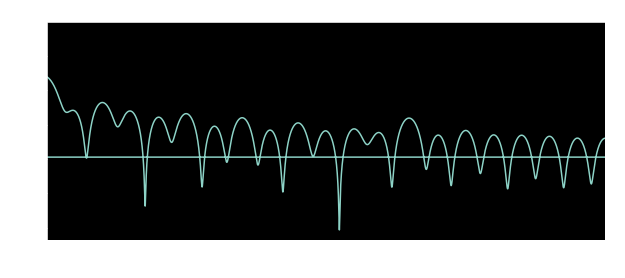

In [91]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_120_10, 20*np.log10(ft_120_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 10ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1200 Hz and other is around 1300 Hz. We find the exact frequencies by seeing the plot interactively.

In [93]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_120_10, 20*np.log10(ft_120_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 10ms interval")
plt.xlim(1000 , 2000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1200 Hz and 1300 Hz. 

In [94]:
f0_5ms  = 1300 - 1200
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  100  Hz, and the error is  20  Hz


#### Window length 20 ms

<function matplotlib.pyplot.show(close=None, block=None)>

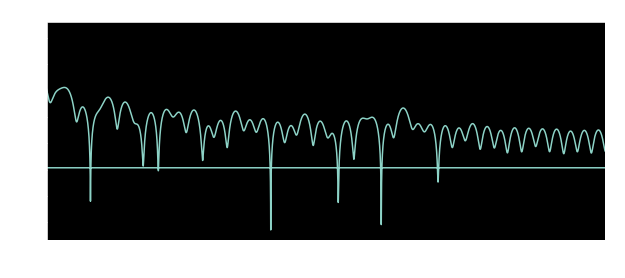

In [95]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_120_20, 20*np.log10(ft_120_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000, 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1250 Hz and other is around 1400 Hz. We find the exact frequencies by seeing the plot interactively.

In [96]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_120_20, 20*np.log10(ft_120_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1366 Hz and 1200 Hz. 

In [97]:
f0_5ms  = 1366 - 1200
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  166  Hz, and the error is  -46  Hz


#### Window length 40 ms

<function matplotlib.pyplot.show(close=None, block=None)>

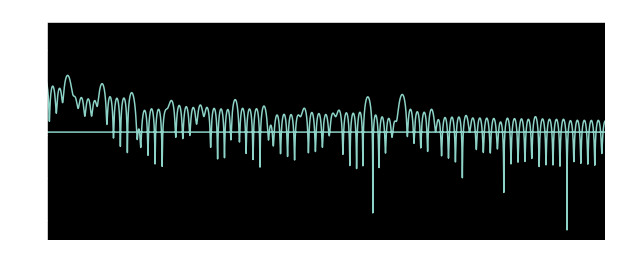

In [98]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_120_40, 20*np.log10(ft_120_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1100 Hz and other is around 1200 Hz. We find the exact frequencies by seeing the plot interactively

In [99]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_120_40, 20*np.log10(ft_120_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1072 Hz and 1197 Hz. 

In [100]:
f0_5ms  = 1197 - 1072
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  125  Hz, and the error is  -5  Hz


### <b> Hence we can observe that as the window length increases we can better estimate the f0

## Pitch = 220 Hz

In [101]:
F0 = 220      ## Given value of pitch

## DFT using Hamming Windows (Pitch = 120 Hz)

Text(0.5, 1.0, 'DFT using a Hamming Window of 40ms interval')

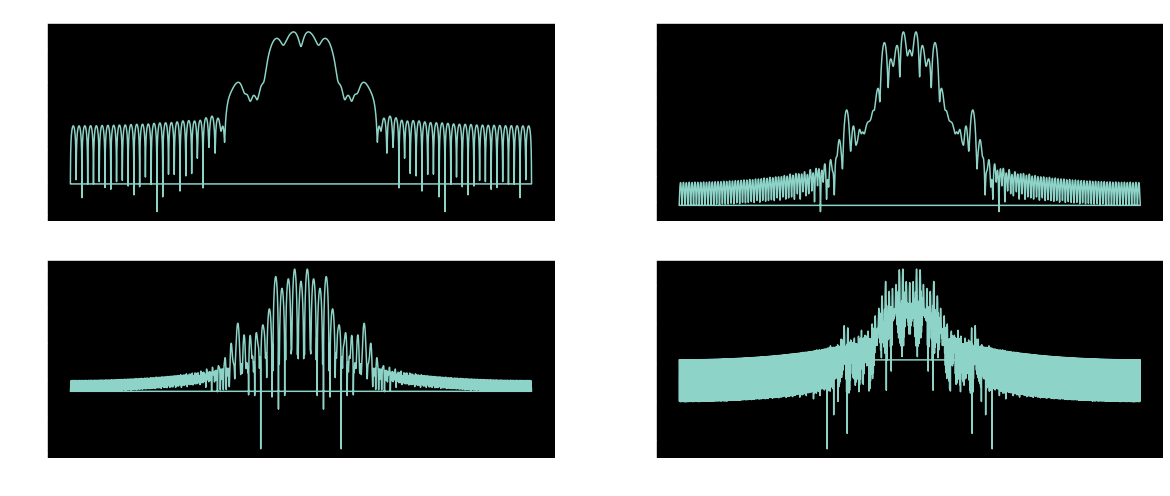

In [109]:
# Find the DFT of the signals using Hamming window

ft_220_5 , f_220_5 =  dft(u_220, hamming_5ms)
ft_220_10 , f_220_10 = dft(u_220, hamming_10ms)
ft_220_20 , f_220_20 = dft(u_220, hamming_20ms)
ft_220_40 , f_220_40 = dft(u_220 , hamming_40ms)


# Plot the DFTs 
%matplotlib inline

plt.figure(figsize = (20,8))
plt.subplot(2,2,1)
plt.plot(f_220_5, 20*np.log10(ft_220_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")

plt.subplot(2,2,2)
plt.plot(f_220_10, 20*np.log10(ft_220_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 10ms interval")

plt.subplot(2,2,3)
plt.plot(f_220_20, 20*np.log10(ft_220_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 20ms interval")

plt.subplot(2,2,4)
plt.plot(f_220_40 , 20*np.log10(ft_120_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 40ms interval")


## Getting the signal properties from the DFT obtained

<b> For all the DFT plots we can observe the following </b> :
- We can see from the DFT plot that the first formant frequency is somewhere between 0- 500 Hz
- Also we can see that the second formant is in range 500-1000 Hz
- The third formant lies in the range 2000-3000 Hz

### <b> For DFT of /u/ (pitch = 220 Hz) and Hamming Window of 5 ms </b>

In [110]:
f1_5ms  = find_formant(ft_220_5 , f_220_5 , 0, 500)[0]
f2_5ms  = find_formant(ft_220_5 , f_220_5 , 600, 1000)[0]
f3_5ms = find_formant(ft_220_5 , f_220_5 , 2000, 3000)[0]
print("The first formant is at ", str(f1_5ms), "and the error from ground truth is ", str(F1-f1_5ms) , "Hz")
print("The second formant is at ", str(f2_5ms), "and the error from ground truth is ", str(F2-f2_5ms), "Hz")
print("The third formant is at ", str(f3_5ms), "and the error from ground truth is ", str(F3-f3_5ms), "Hz")

The first formant is at  258.5541445855414 and the error from ground truth is  41.445855414458606 Hz
The second formant is at  836.5163483651634 and the error from ground truth is  33.48365163483663 Hz
The third formant is at  2175.082491750825 and the error from ground truth is  64.91750824917517 Hz


### <b> For DFT of /u/ (pitch = 220 Hz) and Hamming Window of 10 ms </b>

In [111]:
f1_10ms  = find_formant(ft_220_10 , f_220_10 , 0, 500)[0]
f2_10ms  = find_formant(ft_220_10 , f_220_10 , 500, 1000)[0]
f3_10ms = find_formant(ft_220_10 , f_220_10 , 2000, 3000)[0]
print("The first formant is at ", str(f1_10ms), "and the error from ground truth is ", str(F1-f1_10ms) , "Hz")
print("The second formant is at ", str(f2_10ms), "and the error from ground truth is ", str(F2-f2_10ms), "Hz")
print("The third formant is at ", str(f3_10ms), "and the error from ground truth is ", str(F3-f3_10ms), "Hz")

The first formant is at  218.5781421857814 and the error from ground truth is  81.42185781421861 Hz
The second formant is at  877.7422257774222 and the error from ground truth is  -7.7422257774221634 Hz
The third formant is at  2187.0712928707126 and the error from ground truth is  52.92870712928743 Hz


### <b> For DFT of /u/ (pitch = 220 Hz) and Hamming Window of 20 ms </b>

In [112]:
f1_20ms  = find_formant(ft_220_20 , f_220_20 , 0, 500)[0]
f2_20ms  = find_formant(ft_220_20 , f_220_20 , 500, 1000)[0]
f3_20ms = find_formant(ft_220_20 , f_220_20 , 2000, 3000)[0]
print("The first formant is at ", str(f1_20ms), "and the error from ground truth is ", str(F1-f1_20ms) , "Hz")
print("The second formant is at ", str(f2_20ms), "and the error from ground truth is ", str(F2-f2_20ms), "Hz")
print("The third formant is at ", str(f3_20ms), "and the error from ground truth is ", str(F3-f3_20ms), "Hz")

The first formant is at  219.52304769523045 and the error from ground truth is  80.47695230476955 Hz
The second formant is at  876.6223377662233 and the error from ground truth is  -6.622337766223268 Hz
The third formant is at  2191.3708629137086 and the error from ground truth is  48.629137086291394 Hz


### <b> For DFT of /u/ (pitch = 220 Hz) and Hamming Window of 40 ms </b>

In [113]:
f1_40ms  = find_formant(ft_220_40 , f_220_40 , 0, 500)[0]
f2_40ms  = find_formant(ft_220_40 , f_220_40 , 500, 1000)[0]
f3_40ms = find_formant(ft_220_40 , f_220_40 , 2000, 3000)[0]
print("The first formant is at ", str(f1_40ms), "and the error from ground truth is ", str(F1-f1_40ms) , "Hz")
print("The second formant is at ", str(f2_40ms), "and the error from ground truth is ", str(F2-f2_40ms), "Hz")
print("The third formant is at ", str(f3_40ms), "and the error from ground truth is ", str(F3-f3_40ms), "Hz")

The first formant is at  219.10308969103087 and the error from ground truth is  80.89691030896913 Hz
The second formant is at  876.6698330166982 and the error from ground truth is  -6.669833016698249 Hz
The third formant is at  2190.3709629037094 and the error from ground truth is  49.62903709629063 Hz


### Hence we can see that the obtained formant frequencies are close to the ground truth formants in all the cases

### <b> Estimating F0 from the DFT plots obtained </b>

#### Window length 5 ms

<function matplotlib.pyplot.show(close=None, block=None)>

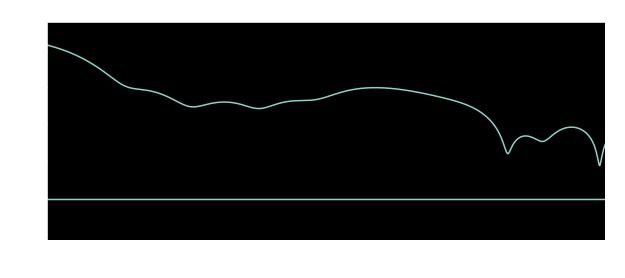

In [114]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_220_5, 20*np.log10(ft_220_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1300 Hz and other is around 1600 Hz. We find the exact frequencies by seeing the plot interactively

In [116]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_220_5, 20*np.log10(ft_220_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1100,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1400 Hz and 1680 Hz. 

In [118]:
f0_5ms  = 1680 - 1400
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  280  Hz, and the error is  -60  Hz


#### Window length 10 ms

<function matplotlib.pyplot.show(close=None, block=None)>

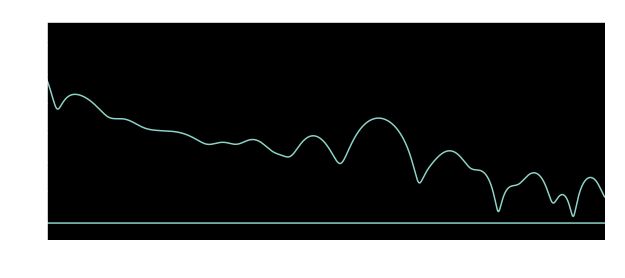

In [120]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_220_10, 20*np.log10(ft_220_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 10ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 2200 Hz and other is around 2400 Hz. We find the exact frequencies by seeing the plot interactively.

In [122]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_220_10, 20*np.log10(ft_220_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 10ms interval")
plt.xlim(1000 , 3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 2200 Hz and 2430 Hz. 

In [123]:
f0_5ms  = 2430 - 2200
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  230  Hz, and the error is  -10  Hz


#### Window length 20 ms

<function matplotlib.pyplot.show(close=None, block=None)>

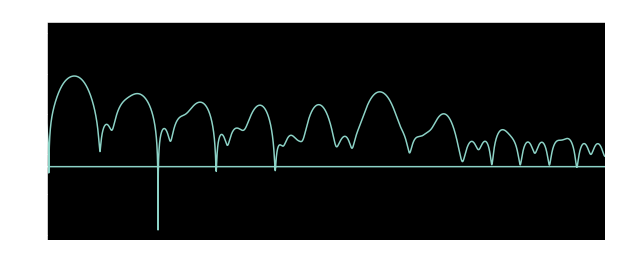

In [124]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_220_20, 20*np.log10(ft_220_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000, 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1100 Hz and other is around 1280 Hz. We find the exact frequencies by seeing the plot interactively.

In [125]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_220_20, 20*np.log10(ft_220_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1100 Hz and 1330 Hz. 

In [126]:
f0_5ms  = 1330 - 1100
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  230  Hz, and the error is  -10  Hz


#### Window length 40 ms

<function matplotlib.pyplot.show(close=None, block=None)>

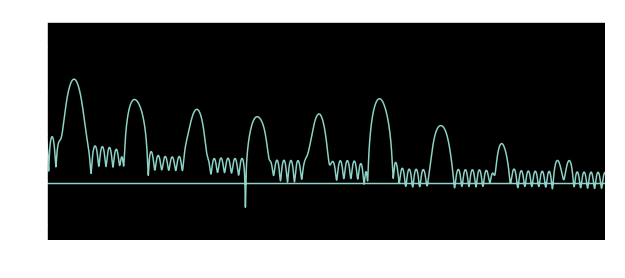

In [128]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_220_40, 20*np.log10(ft_220_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1100 Hz and other is around 1300 Hz. We find the exact frequencies by seeing the plot interactively

In [129]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_220_40, 20*np.log10(ft_220_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1100 Hz and 1320 Hz. 

In [131]:
f0_5ms  = 1320 - 1100
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  220  Hz, and the error is  0  Hz


### <b> Hence we can observe that as the window length increases we can better estimate the f0

## DFT using Rectangular Windows (Pitch = 220 Hz)

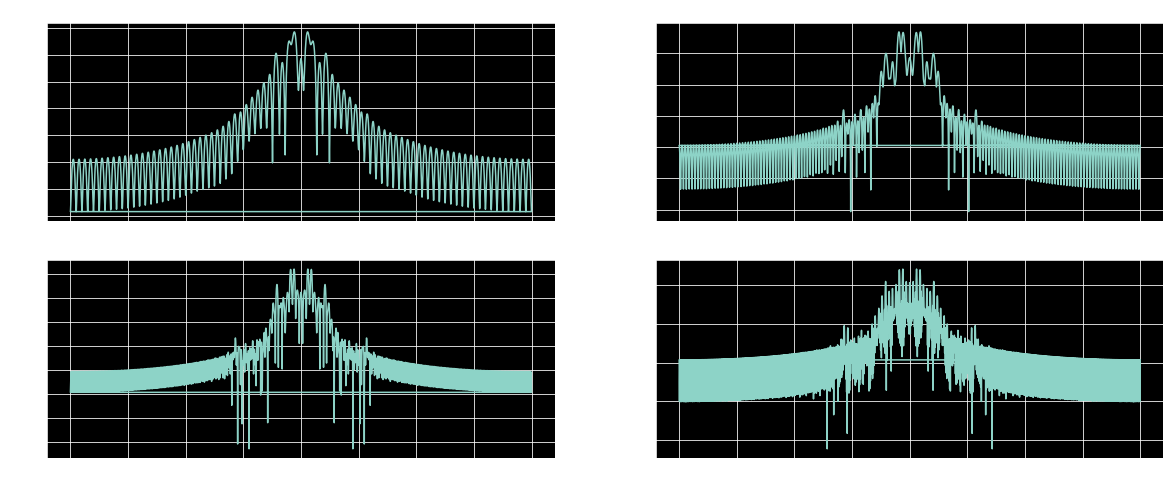

In [132]:
# Finding the DFT using a rectangular window of given time intervals

%matplotlib inline

ft_120_5 , f_120_5 = dft(u_120, rectangular_5ms)
ft_120_10 , f_120_10 = dft(u_120, rectangular_10ms)
ft_120_20 , f_120_20 = dft(u_120, rectangular_20ms)
ft_120_40 , f_120_40= dft(u_120, rectangular_40ms)


# Plot the DFTs 
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)
plt.plot(f_120_5, 20*np.log10(ft_120_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Rectangular Window of 5ms interval")
plt.grid()

plt.subplot(2,2,2)
plt.plot(f_120_10, 20*np.log10(ft_120_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Rectangular Window of 10ms interval")
plt.grid()

plt.subplot(2,2,3)
plt.plot(f_120_20, 20*np.log10(ft_120_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Rectangular Window of 20ms interval")
plt.grid()

plt.subplot(2,2,4)
plt.plot(f_120_40 , 20*np.log10(ft_120_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Rectangular Window of 40ms interval")
plt.grid()


<b> For all the DFT plots we can observe the following </b> :
- We can see from the DFT plot that the first formant frequency is somewhere between 0- 500 Hz
- Also we can see that the second formant is in range 500-1000 Hz
- The third formant lies in the range 2000-3000 Hz

### <b> For DFT of /u/ (pitch = 220 Hz) and Rectangular Window of 5 ms </b>

In [133]:
f1_5ms  = find_formant(ft_220_5 , f_220_5 , 0, 500)[0]
f2_5ms  = find_formant(ft_220_5 , f_220_5 , 500, 1000)[0]
f3_5ms = find_formant(ft_220_5 , f_220_5 , 2000, 3000)[0]
print("The first formant is at ", str(f1_5ms), "and the error from ground truth is ", str(F1-f1_5ms) , "Hz")
print("The second formant is at ", str(f2_5ms), "and the error from ground truth is ", str(F2-f2_5ms), "Hz")
print("The third formant is at ", str(f3_5ms), "and the error from ground truth is ", str(F3-f3_5ms), "Hz")

The first formant is at  258.5541445855414 and the error from ground truth is  41.445855414458606 Hz
The second formant is at  836.5163483651634 and the error from ground truth is  33.48365163483663 Hz
The third formant is at  2175.082491750825 and the error from ground truth is  64.91750824917517 Hz


### <b> For DFT of /u/ (pitch = 220 Hz) and Rectangular Window of 10 ms </b>

In [134]:
f1_10ms  = find_formant(ft_220_10 , f_220_10 , 0, 500)[0]
f2_10ms  = find_formant(ft_220_10 , f_220_10 , 500, 1000)[0]
f3_10ms = find_formant(ft_220_10 , f_220_10 , 2000, 3000)[0]
print("The first formant is at ", str(f1_10ms), "and the error from ground truth is ", str(F1-f1_10ms) , "Hz")
print("The second formant is at ", str(f2_10ms), "and the error from ground truth is ", str(F2-f2_10ms), "Hz")
print("The third formant is at ", str(f3_10ms), "and the error from ground truth is ", str(F3-f3_10ms), "Hz")

The first formant is at  218.5781421857814 and the error from ground truth is  81.42185781421861 Hz
The second formant is at  877.7422257774222 and the error from ground truth is  -7.7422257774221634 Hz
The third formant is at  2187.0712928707126 and the error from ground truth is  52.92870712928743 Hz


### <b> For DFT of /u/ (pitch = 220 Hz) and Rectangular Window of 20 ms </b>

In [135]:
f1_20ms  = find_formant(ft_220_20 , f_220_20 , 0, 500)[0]
f2_20ms  = find_formant(ft_220_20 , f_220_20 , 500, 1000)[0]
f3_20ms = find_formant(ft_220_20 , f_220_20 , 2000, 3000)[0]
print("The first formant is at ", str(f1_20ms), "and the error from ground truth is ", str(F1-f1_20ms) , "Hz")
print("The second formant is at ", str(f2_20ms), "and the error from ground truth is ", str(F2-f2_20ms), "Hz")
print("The third formant is at ", str(f3_20ms), "and the error from ground truth is ", str(F3-f3_20ms), "Hz")

The first formant is at  219.52304769523045 and the error from ground truth is  80.47695230476955 Hz
The second formant is at  876.6223377662233 and the error from ground truth is  -6.622337766223268 Hz
The third formant is at  2191.3708629137086 and the error from ground truth is  48.629137086291394 Hz


### <b> For DFT of /u/ (pitch = 220 Hz) and Rectangular Window of 40 ms </b>

In [136]:
f1_40ms  = find_formant(ft_220_40 , f_220_40 , 0, 500)[0]
f2_40ms  = find_formant(ft_220_40 , f_220_40 , 500, 1000)[0]
f3_40ms = find_formant(ft_220_40 , f_220_40 , 2000, 3000)[0]
print("The first formant is at ", str(f1_40ms), "and the error from ground truth is ", str(F1-f1_40ms) , "Hz")
print("The second formant is at ", str(f2_40ms), "and the error from ground truth is ", str(F2-f2_40ms), "Hz")
print("The third formant is at ", str(f3_40ms), "and the error from ground truth is ", str(F3-f3_40ms), "Hz")

The first formant is at  219.10308969103087 and the error from ground truth is  80.89691030896913 Hz
The second formant is at  876.6698330166982 and the error from ground truth is  -6.669833016698249 Hz
The third formant is at  2190.3709629037094 and the error from ground truth is  49.62903709629063 Hz


### Hence we can see that the obtained formant frequencies are close to the ground truth formants in all the cases

### <b> Estimating F0 from the DFT plots obtained </b>

#### Window length 5 ms

<function matplotlib.pyplot.show(close=None, block=None)>

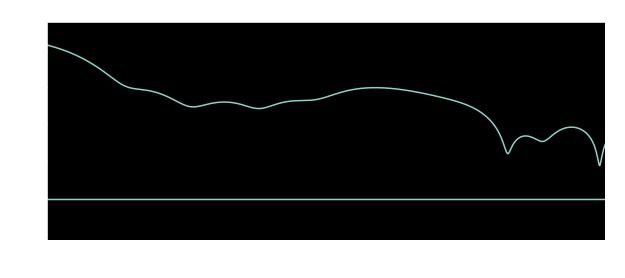

In [137]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_220_5, 20*np.log10(ft_220_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1300 Hz and other is around 1600 Hz. We find the exact frequencies by seeing the plot interactively

In [138]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_220_5, 20*np.log10(ft_220_5))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1100,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1400 Hz and 1645 Hz. 

In [139]:
f0_5ms  = 1645 - 1400
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  245  Hz, and the error is  -25  Hz


#### Window length 10 ms

<function matplotlib.pyplot.show(close=None, block=None)>

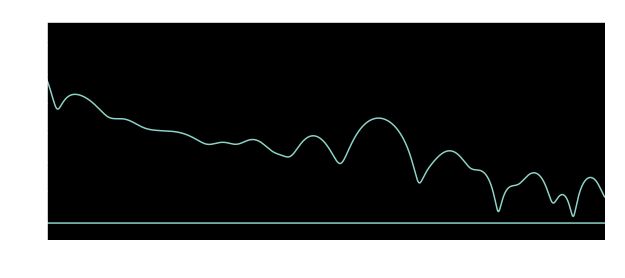

In [140]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_220_10, 20*np.log10(ft_220_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 10ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 2200 Hz and other is around 2400 Hz. We find the exact frequencies by seeing the plot interactively.

In [142]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_220_10, 20*np.log10(ft_220_10))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 10ms interval")
plt.xlim(1000 , 3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 2200 Hz and 2440 Hz. 

In [143]:
f0_5ms  = 2440-2200
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  240  Hz, and the error is  -20  Hz


#### Window length 20 ms

<function matplotlib.pyplot.show(close=None, block=None)>

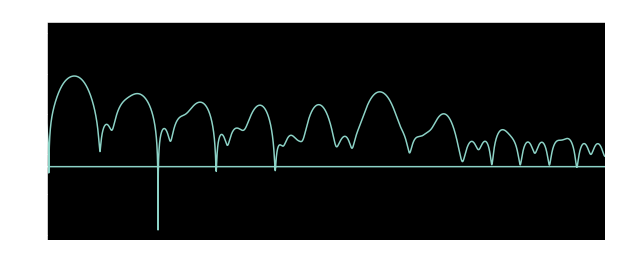

In [144]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_220_20, 20*np.log10(ft_220_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000, 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1100 Hz and other is around 1300 Hz. We find the exact frequencies by seeing the plot interactively.

In [145]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_220_20, 20*np.log10(ft_220_20))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1100 Hz and 1330 Hz. 

In [146]:
f0_5ms  = 1330 - 1100
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  230  Hz, and the error is  -10  Hz


#### Window length 40 ms

<function matplotlib.pyplot.show(close=None, block=None)>

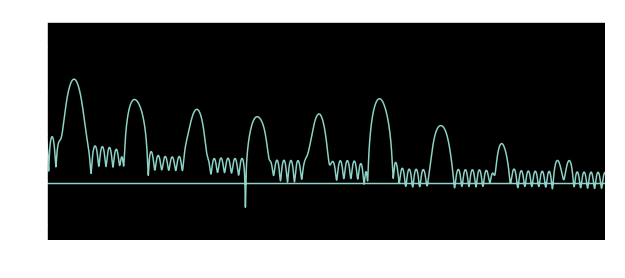

In [147]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(f_220_40, 20*np.log10(ft_220_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000 , 3000)
plt.show

We see two peaks corresponding to the pitch, one of the peak is around 1100 Hz and other is around 1300 Hz. We find the exact frequencies by seeing the plot interactively

In [148]:
%matplotlib qt
plt.figure(figsize = (10,4))
plt.plot(f_220_40, 20*np.log10(ft_220_40))
plt.xlabel("Frequency")
plt.ylabel("DFT magnitude (dB)")
plt.title("DFT using a Hamming Window of 5ms interval")
plt.xlim(1000,3000)
plt.show

<function matplotlib.pyplot.show(*, block=None)>

#### The two peaks are at 1100 Hz and 1320 Hz. 

In [150]:
f0_5ms  = 1320 - 1100
print("The predicted f0 is ", str(f0_5ms)," Hz, and the error is ", str(F0 - f0_5ms), " Hz")

The predicted f0 is  220  Hz, and the error is  0  Hz


### <b> Hence we can observe that as the window length increases we can better estimate the f0

## <b> OBSERVATIONS </b>

- As the window length is increased the frequency resolution increases
- The plots with pitches 120 Hz and 220 Hz are similar in nature, only the peaks are spaced widely when the pitch is increased
- The plots with Hamming window and Rectangular window (for same pitch) also have similar nature, only that the interference of side lobs can be seen to be more in the case of rectangular window